<a href="https://colab.research.google.com/github/alejandrolq/ProyectoFinalStaticalLearningI/blob/main/DeployProyecto_SL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nombre: José Alejandro López Quel**

**Carné: 21001127**

**Statical Learning I**

**Sección U**

**Proyecto Final**

# Parte II: Deployment, inferencia y predicción

### Importando librerías necesarias

In [103]:
import scipy
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from joblib import load
from scipy.stats import norm
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

### Cargando modelos obtenidos de la Parte I

In [38]:
best_modelo_DT = load("max_depth=6_min_samples_split=6_min_samples_leaf=3.joblib")
best_modelo_SVM = load("C=8_kernel=poly.joblib")
best_modelo_NB = load("NB__SibSp_Fare_passenger_sex_passenger_class_Middle_Embarked_C_Embarked_S.joblib")
best_modelo_LRS = load("lr=0.01_epochs=10000_batch_size=500_lambda_parameter=0.01_regularization=lasso.joblib")

### Cargando datos obtenidos en la Parte I para ser utilizados para la parte de predicción

In [32]:
x = load("x_test_deploy.joblib")
y = load("y_test_deploy.joblib")

### Funciones para calcular las predicciones y probabilidades para Logistic Regression Sigmoid y Naive Bayes

In [12]:
def predict_LRS(x, w):
  x_predict = np.append(1,x)
  probabilidad =  1/(1 + np.exp(-np.dot(x_predict, w.squeeze())))
  return np.int(round(probabilidad)), probabilidad

In [44]:
def predict_NB(x, best_modelo_NB):
  output_0 = []
  output_1 = []
  summary_0 = best_modelo_NB['likelihoods_0']
  summary_1 = best_modelo_NB['likelihoods_1']
  prob_1 = best_modelo_NB['prob_1']
  prob_0 = best_modelo_NB['prob_0']

  for i in range(0, summary_0.shape[0]):
    predictions_0 = norm(summary_0[i][0], summary_0[i][1]).cdf(x[0][i])
    predictions_1 = norm(summary_1[i][0], summary_1[i][1]).cdf(x[0][i])
    output_0.append(predictions_0)
    output_1.append(predictions_1)

  x_0_prob = np.array(output_0).T.squeeze()
  x_1_prob = np.array(output_1).T.squeeze()
  x_0 = np.append(x_0_prob, prob_0)
  x_1 = np.append(x_1_prob, prob_1)
  y_0 = np.prod(x_0)
  y_1 = np.prod(x_1)
  y_0_1 = np.append(y_0,y_1)
  prediction = np.argmax(y_0_1)
  return prediction, [y_0, y_1]

### Función para predecir un solo dato

In [117]:
def predict(i, x_test, y_test):
  x = x_test.iloc[i]
  y = y_test.iloc[i]
  x = np.array(x).reshape(1,-1)

  prediccion_DT = best_modelo_DT.predict(x)
  prediccion_SVM = best_modelo_SVM.predict(x)
  prediccion_NB, probabilidades_NB = predict_NB(x, best_modelo_NB)
  prediccion_LRS, probabilidad_LRS = predict_LRS(x, best_modelo_LRS)
  predicciones = [prediccion_DT[0], prediccion_SVM[0], prediccion_NB, prediccion_LRS]
  prediccion_ensemble_learning = mode(predicciones)[0][0]

  labels_dict = {0:"Muerto", 1:"Sobrevivió"}

  print("Número de fila del dato a predecir: " + str(i))
  print("Predicción obtenida:",labels_dict.get(prediccion_ensemble_learning))
  print("Dato Actual:", labels_dict.get(y))
  print("Probabilidad Logistic Regression Sigmoid:", probabilidad_LRS)
  print("Probabilidad Naive Bayes:", probabilidades_NB)

  fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=500)

  plot_tree(best_modelo_DT, feature_names = list(x_test.columns), filled = True, proportion = True)

  fig.savefig('decisiontree_{}.png'.format(i))

  return prediccion_ensemble_learning

### Predicción y visualización de árbol de decisión

Se seleccionan de manera aleatoria datos del dataset de pruebas para obtener su predicción

Número de fila del dato a predecir: 54
Predicción obtenida: Muerto
Dato Actual: Sobrevivió
Probabilidad Logistic Regression Sigmoid: 0.12050038459546232
Probabilidad Naive Bayes: [5.187389039303392e-12, 3.417248442619826e-13]


0

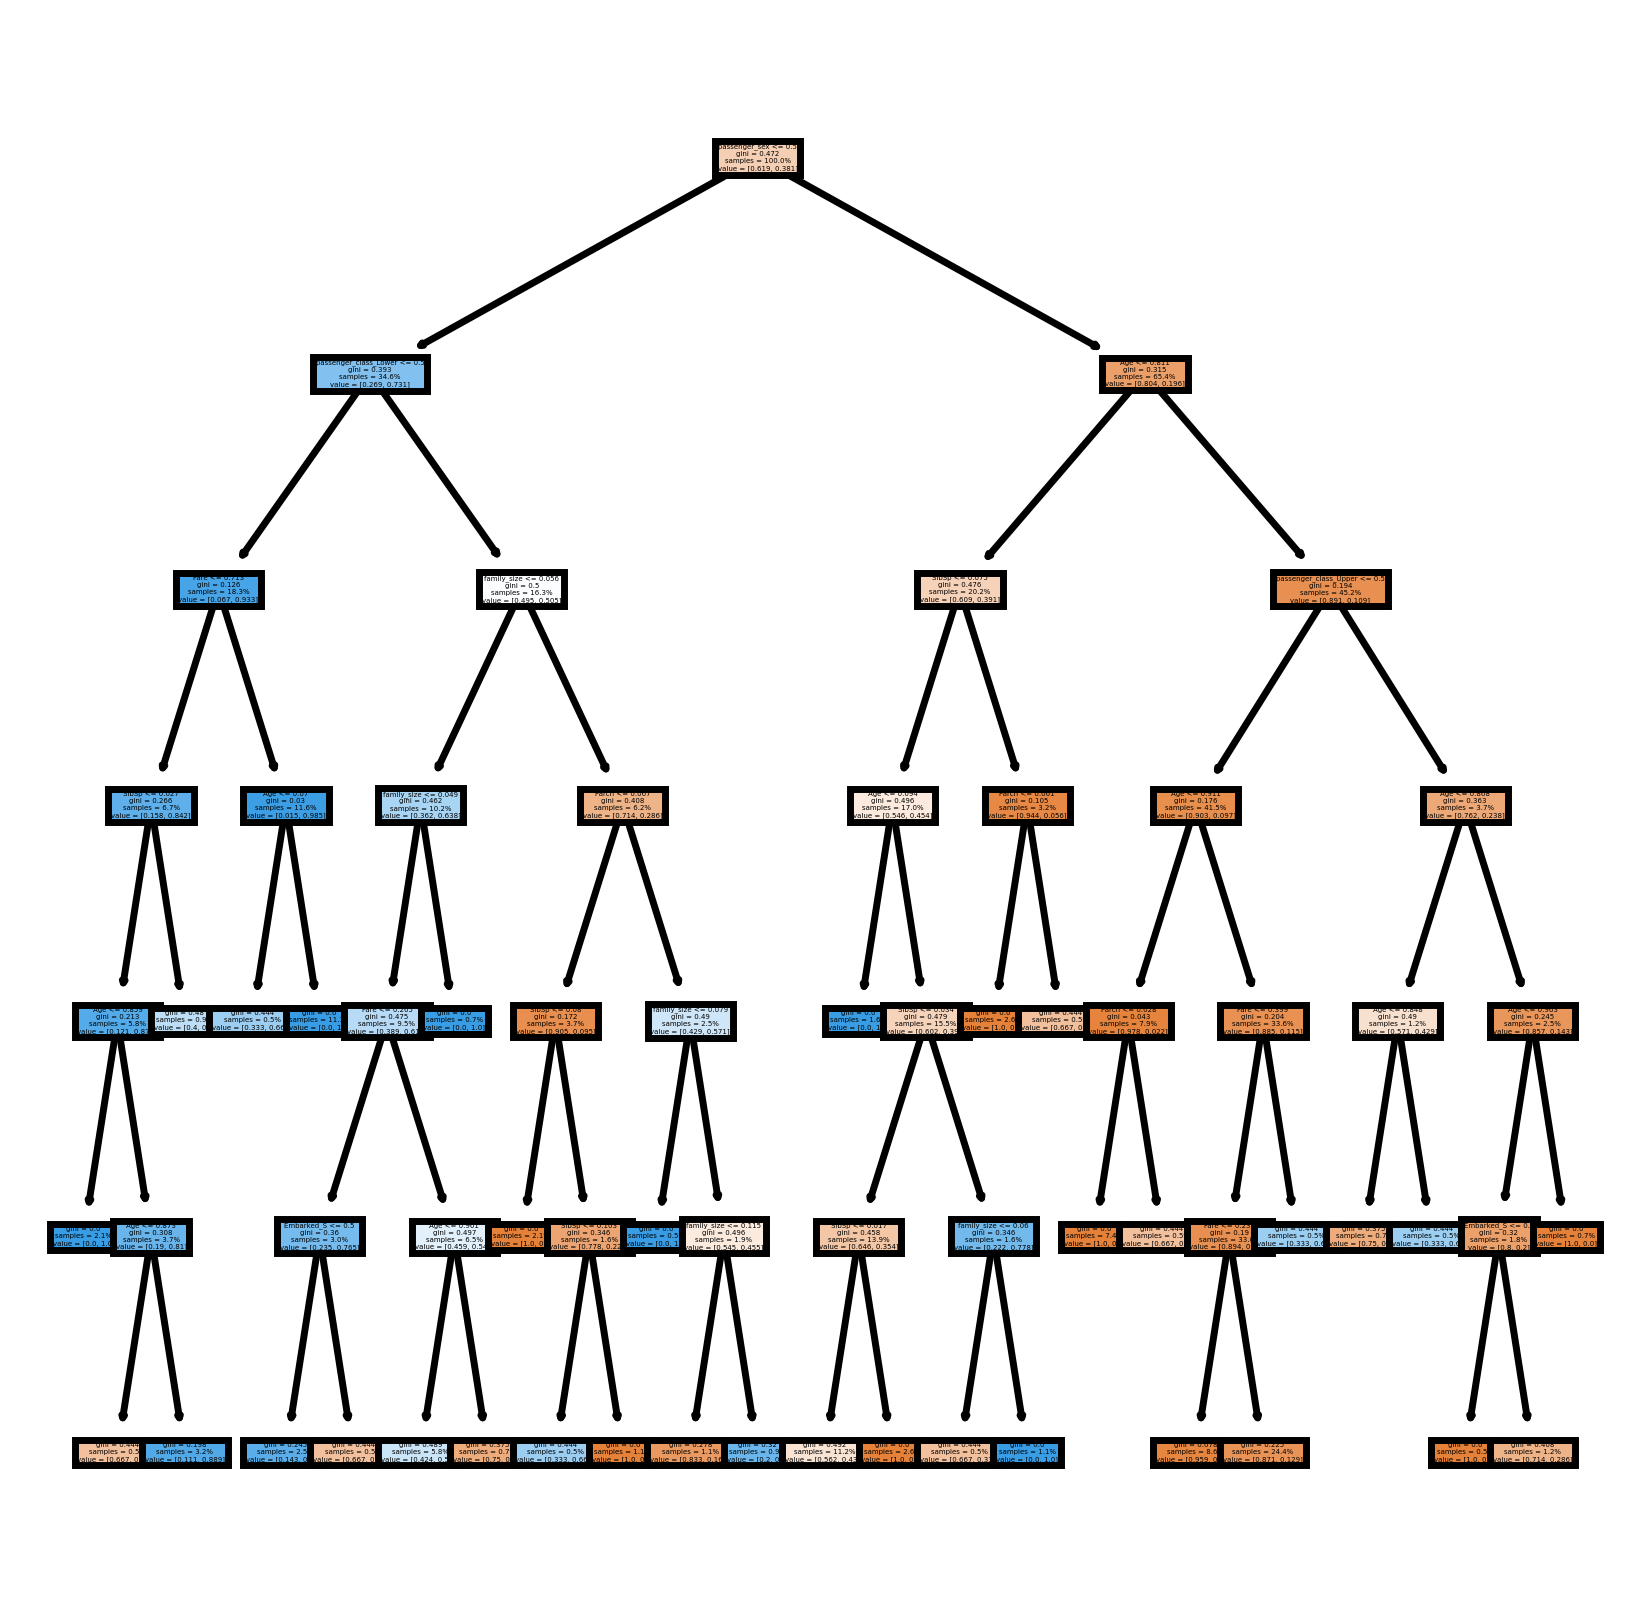

In [118]:
n = random.randint(0,len(x))
predict(n, x, y)

Número de fila del dato a predecir: 111
Predicción obtenida: Muerto
Dato Actual: Muerto
Probabilidad Logistic Regression Sigmoid: 0.12331651275463203
Probabilidad Naive Bayes: [5.931327047380234e-12, 4.181842532274126e-13]


0

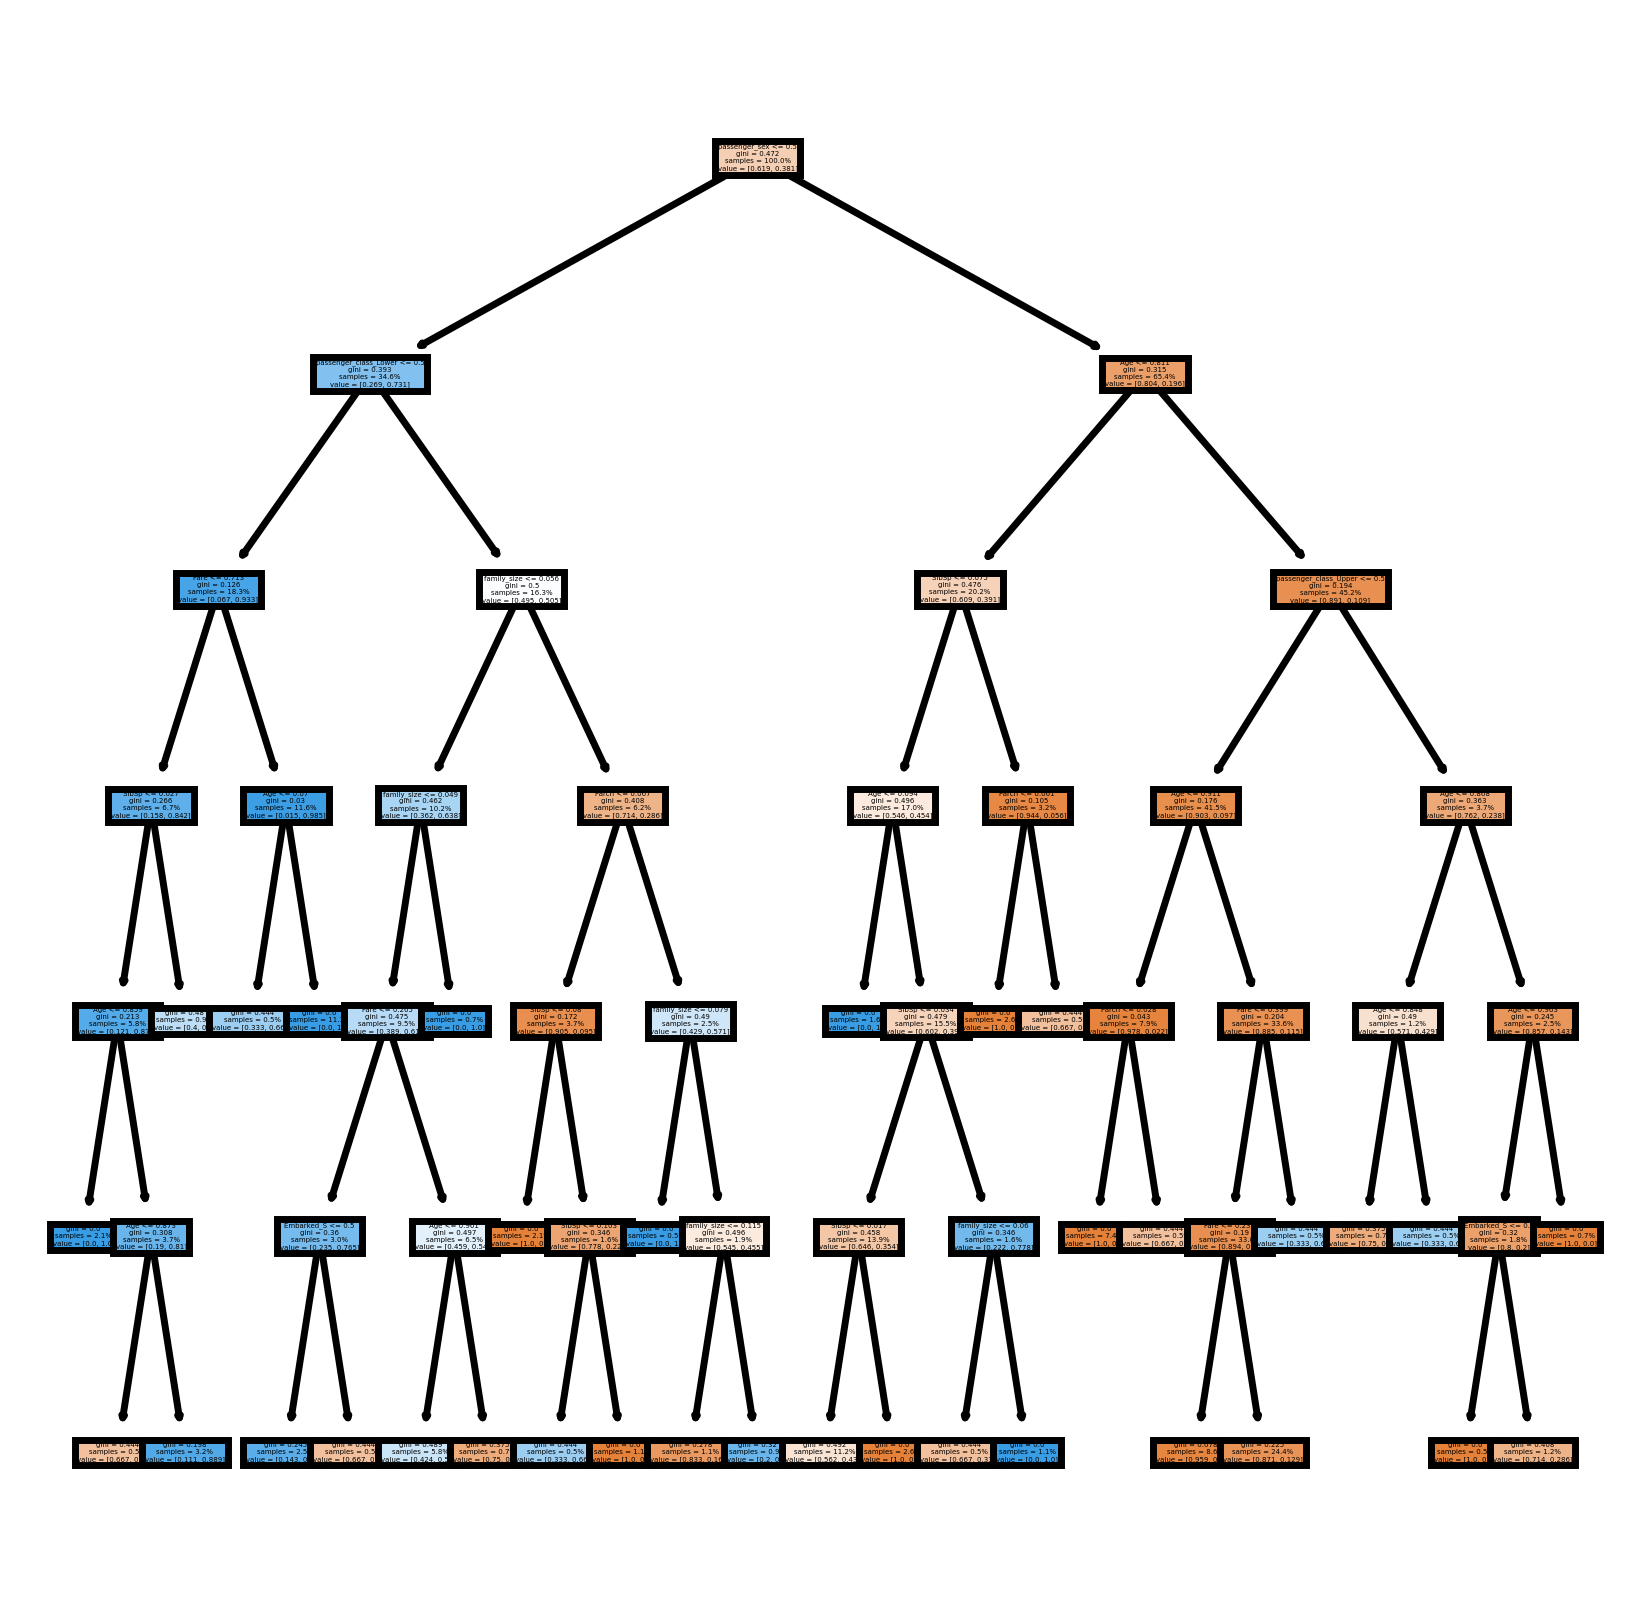

In [119]:
n = random.randint(0,len(x))
predict(n, x, y)

Número de fila del dato a predecir: 123
Predicción obtenida: Sobrevivió
Dato Actual: Sobrevivió
Probabilidad Logistic Regression Sigmoid: 0.8301571383394221
Probabilidad Naive Bayes: [1.5802429908616673e-15, 1.1260041915196752e-13]


1

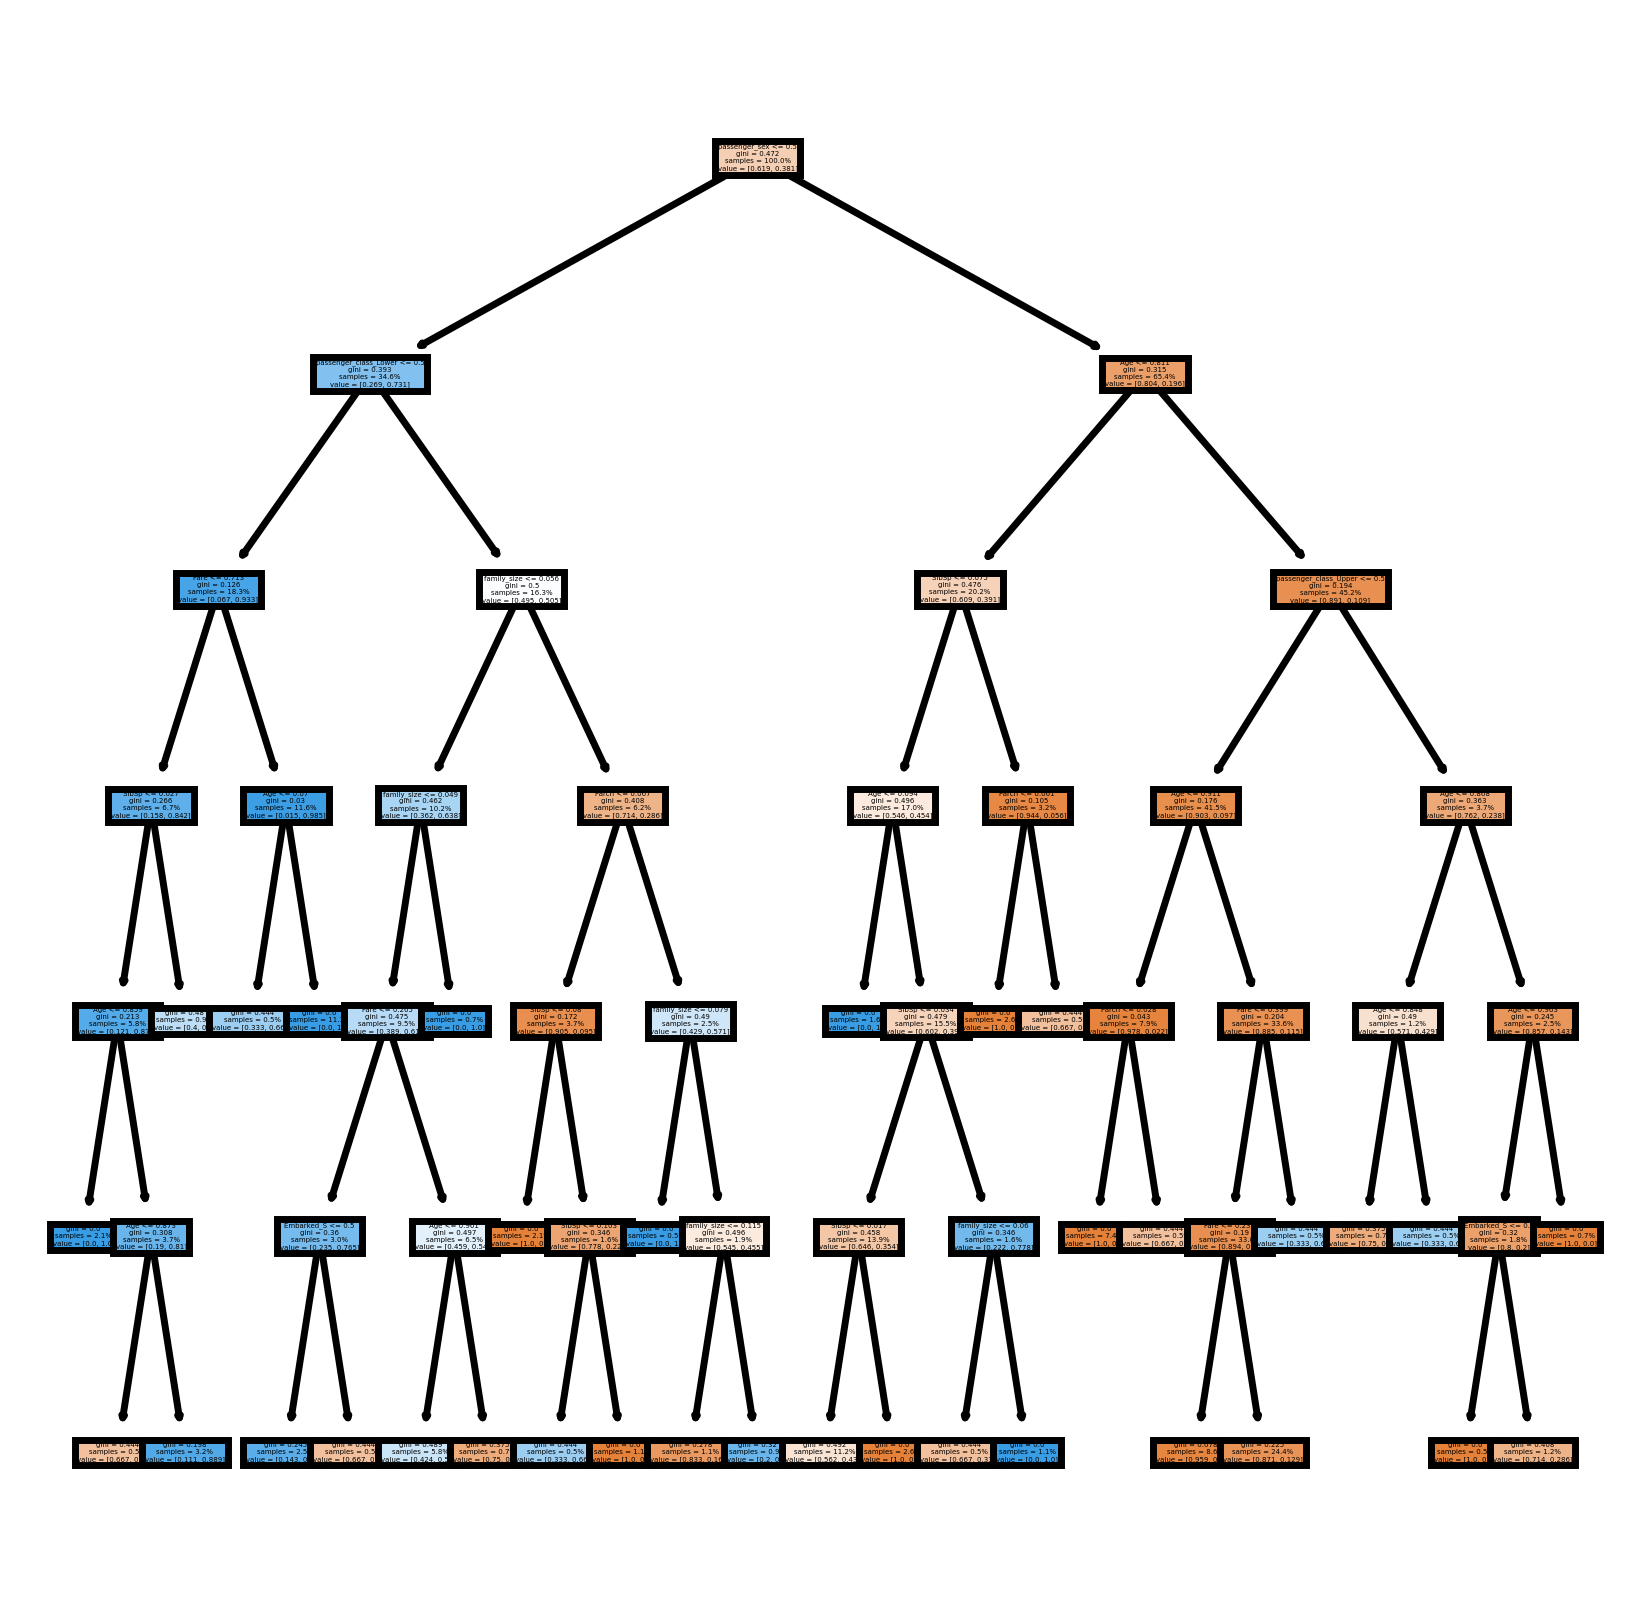

In [120]:
n = random.randint(0,len(x))
predict(n, x, y)

Número de fila del dato a predecir: 10
Predicción obtenida: Muerto
Dato Actual: Muerto
Probabilidad Logistic Regression Sigmoid: 0.12331651275463203
Probabilidad Naive Bayes: [5.931327047380234e-12, 4.181842532274126e-13]


0

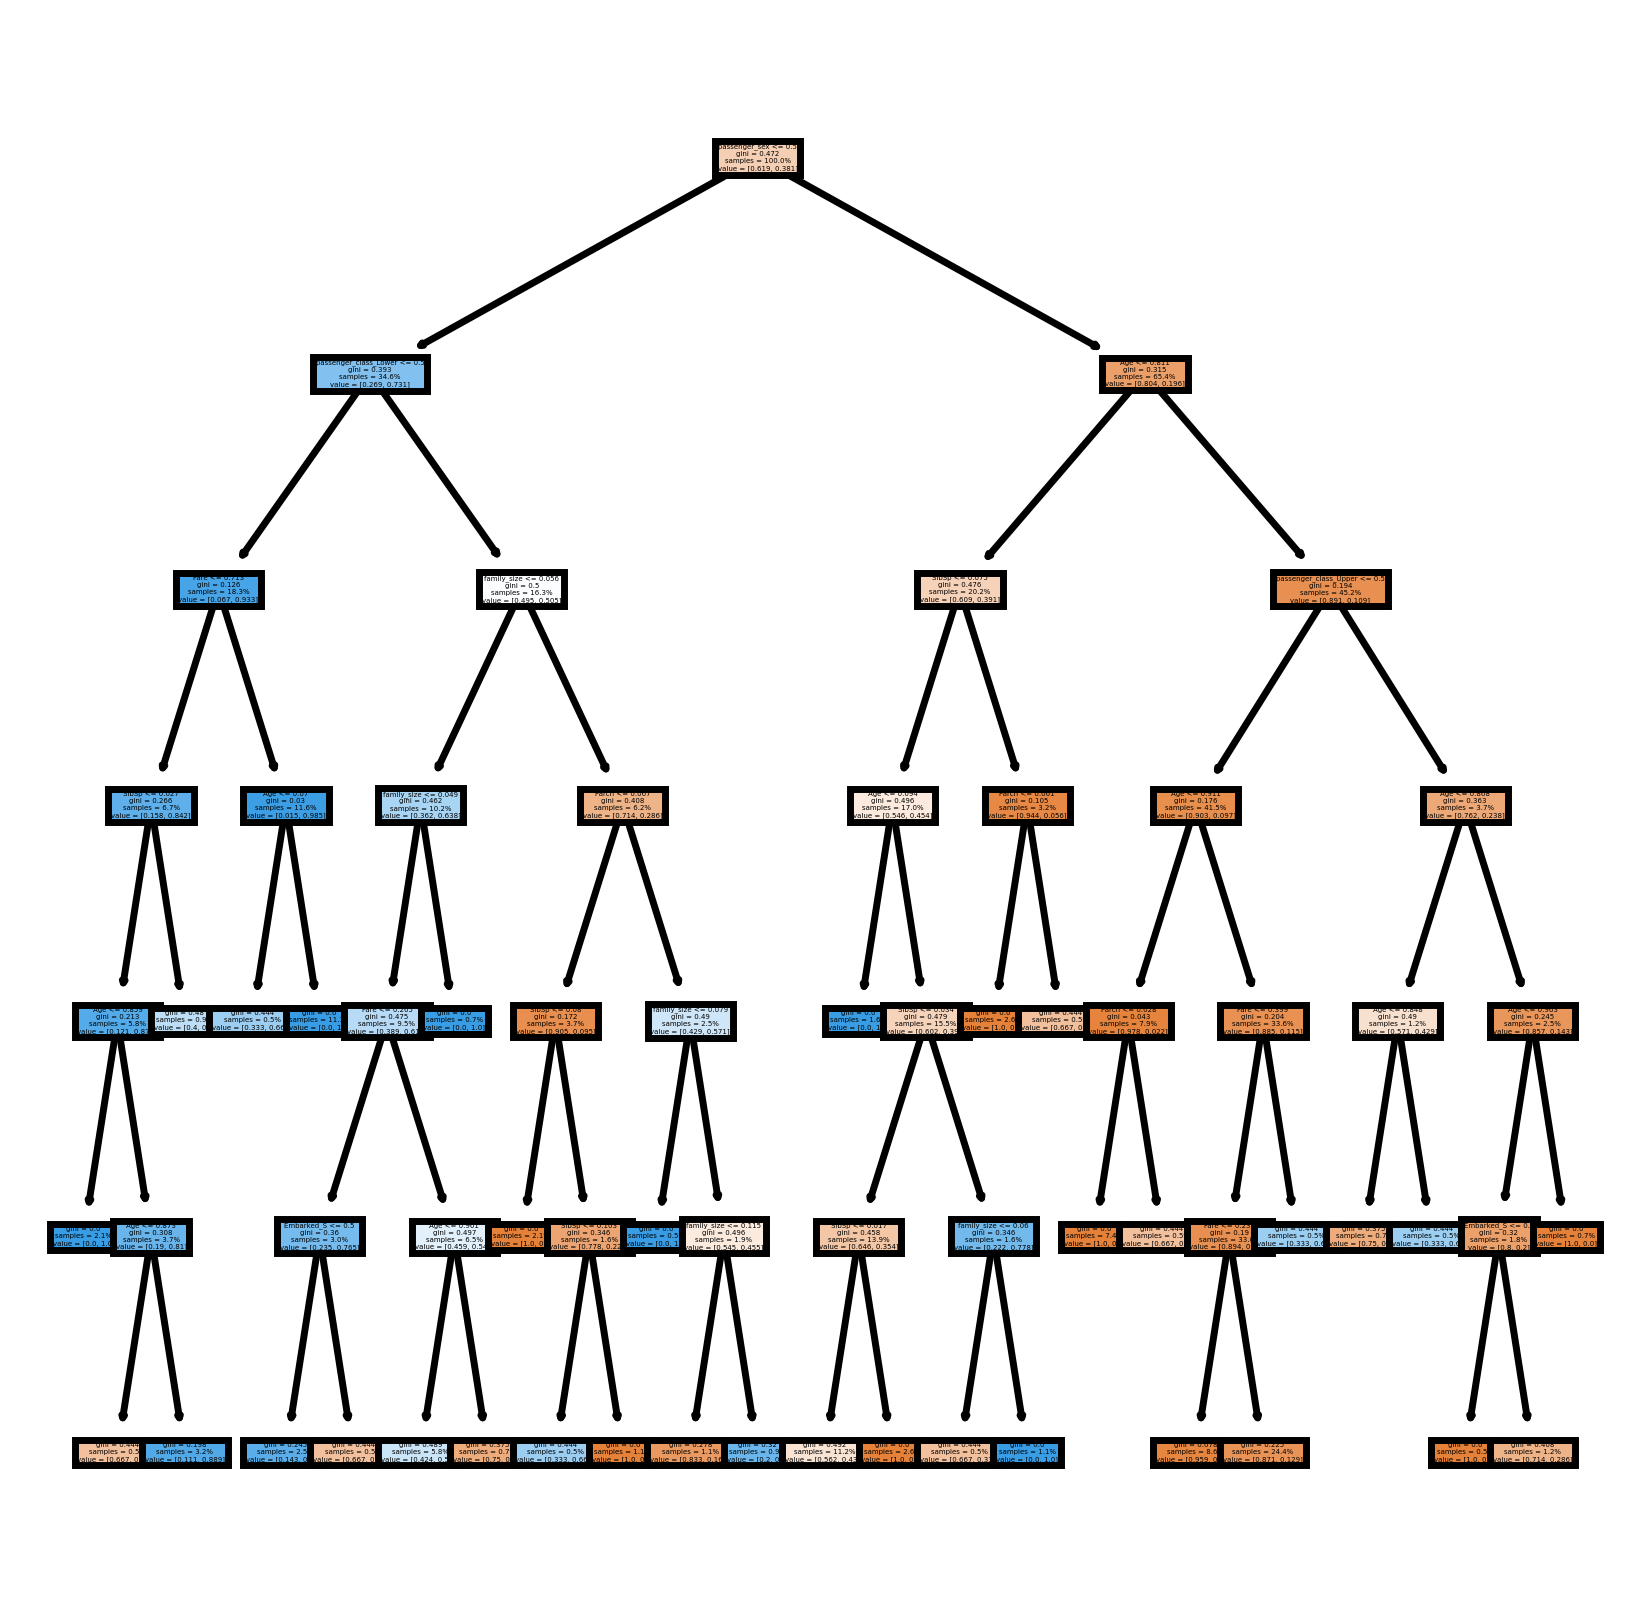

In [121]:
n = random.randint(0,len(x))
predict(n, x, y)

Número de fila del dato a predecir: 147
Predicción obtenida: Muerto
Dato Actual: Muerto
Probabilidad Logistic Regression Sigmoid: 0.1548346978992328
Probabilidad Naive Bayes: [1.3801507199613942e-11, 9.553496510588826e-13]


0

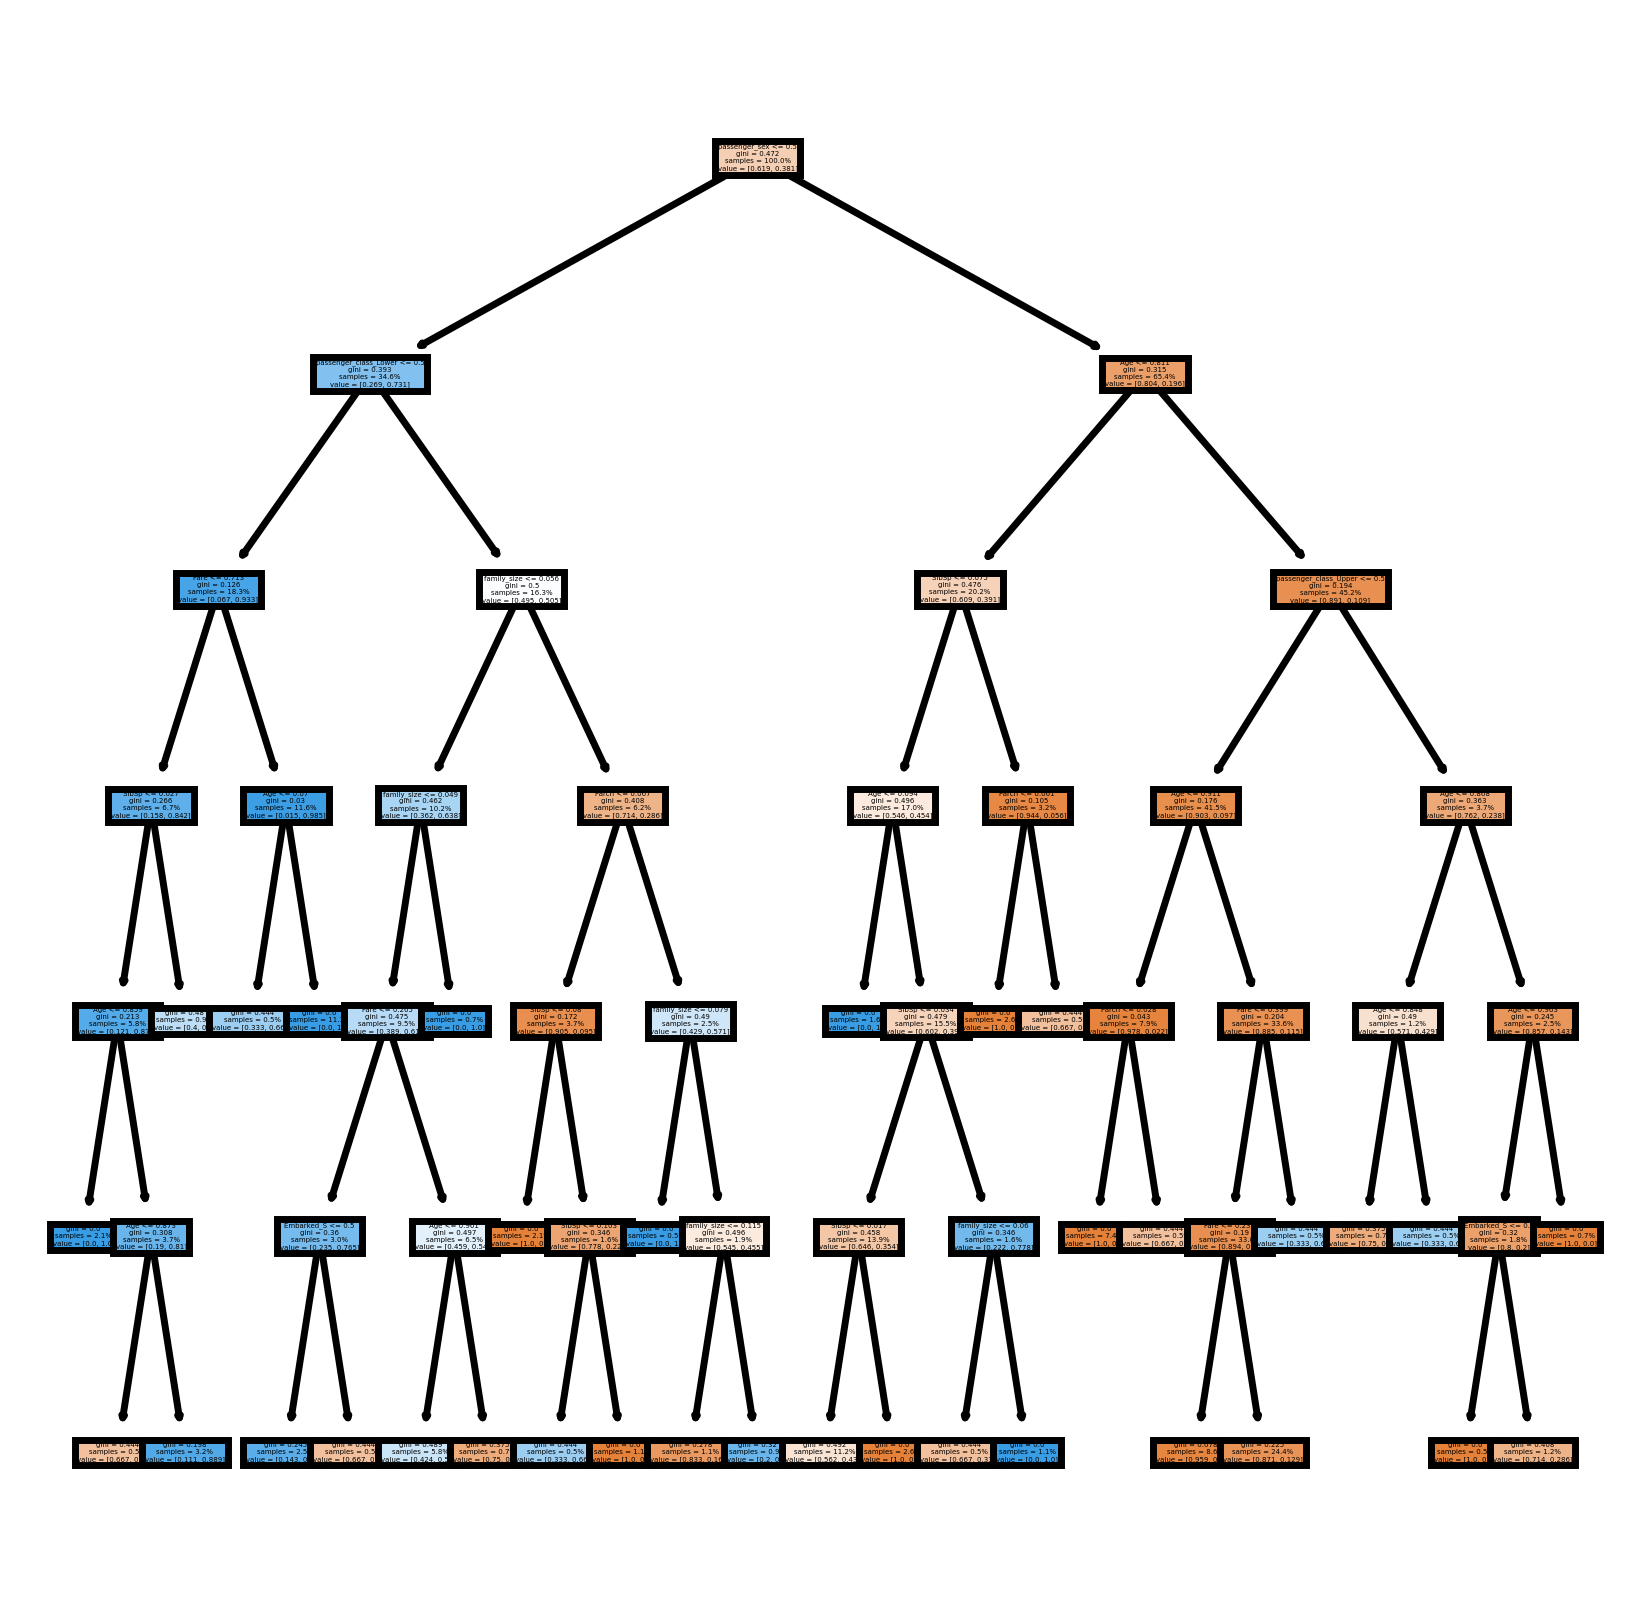

In [122]:
n = random.randint(0,len(x))
predict(n, x, y)

Número de fila del dato a predecir: 143
Predicción obtenida: Muerto
Dato Actual: Muerto
Probabilidad Logistic Regression Sigmoid: 0.17011190033171852
Probabilidad Naive Bayes: [9.46739079996725e-13, 4.3443303115161885e-14]


0

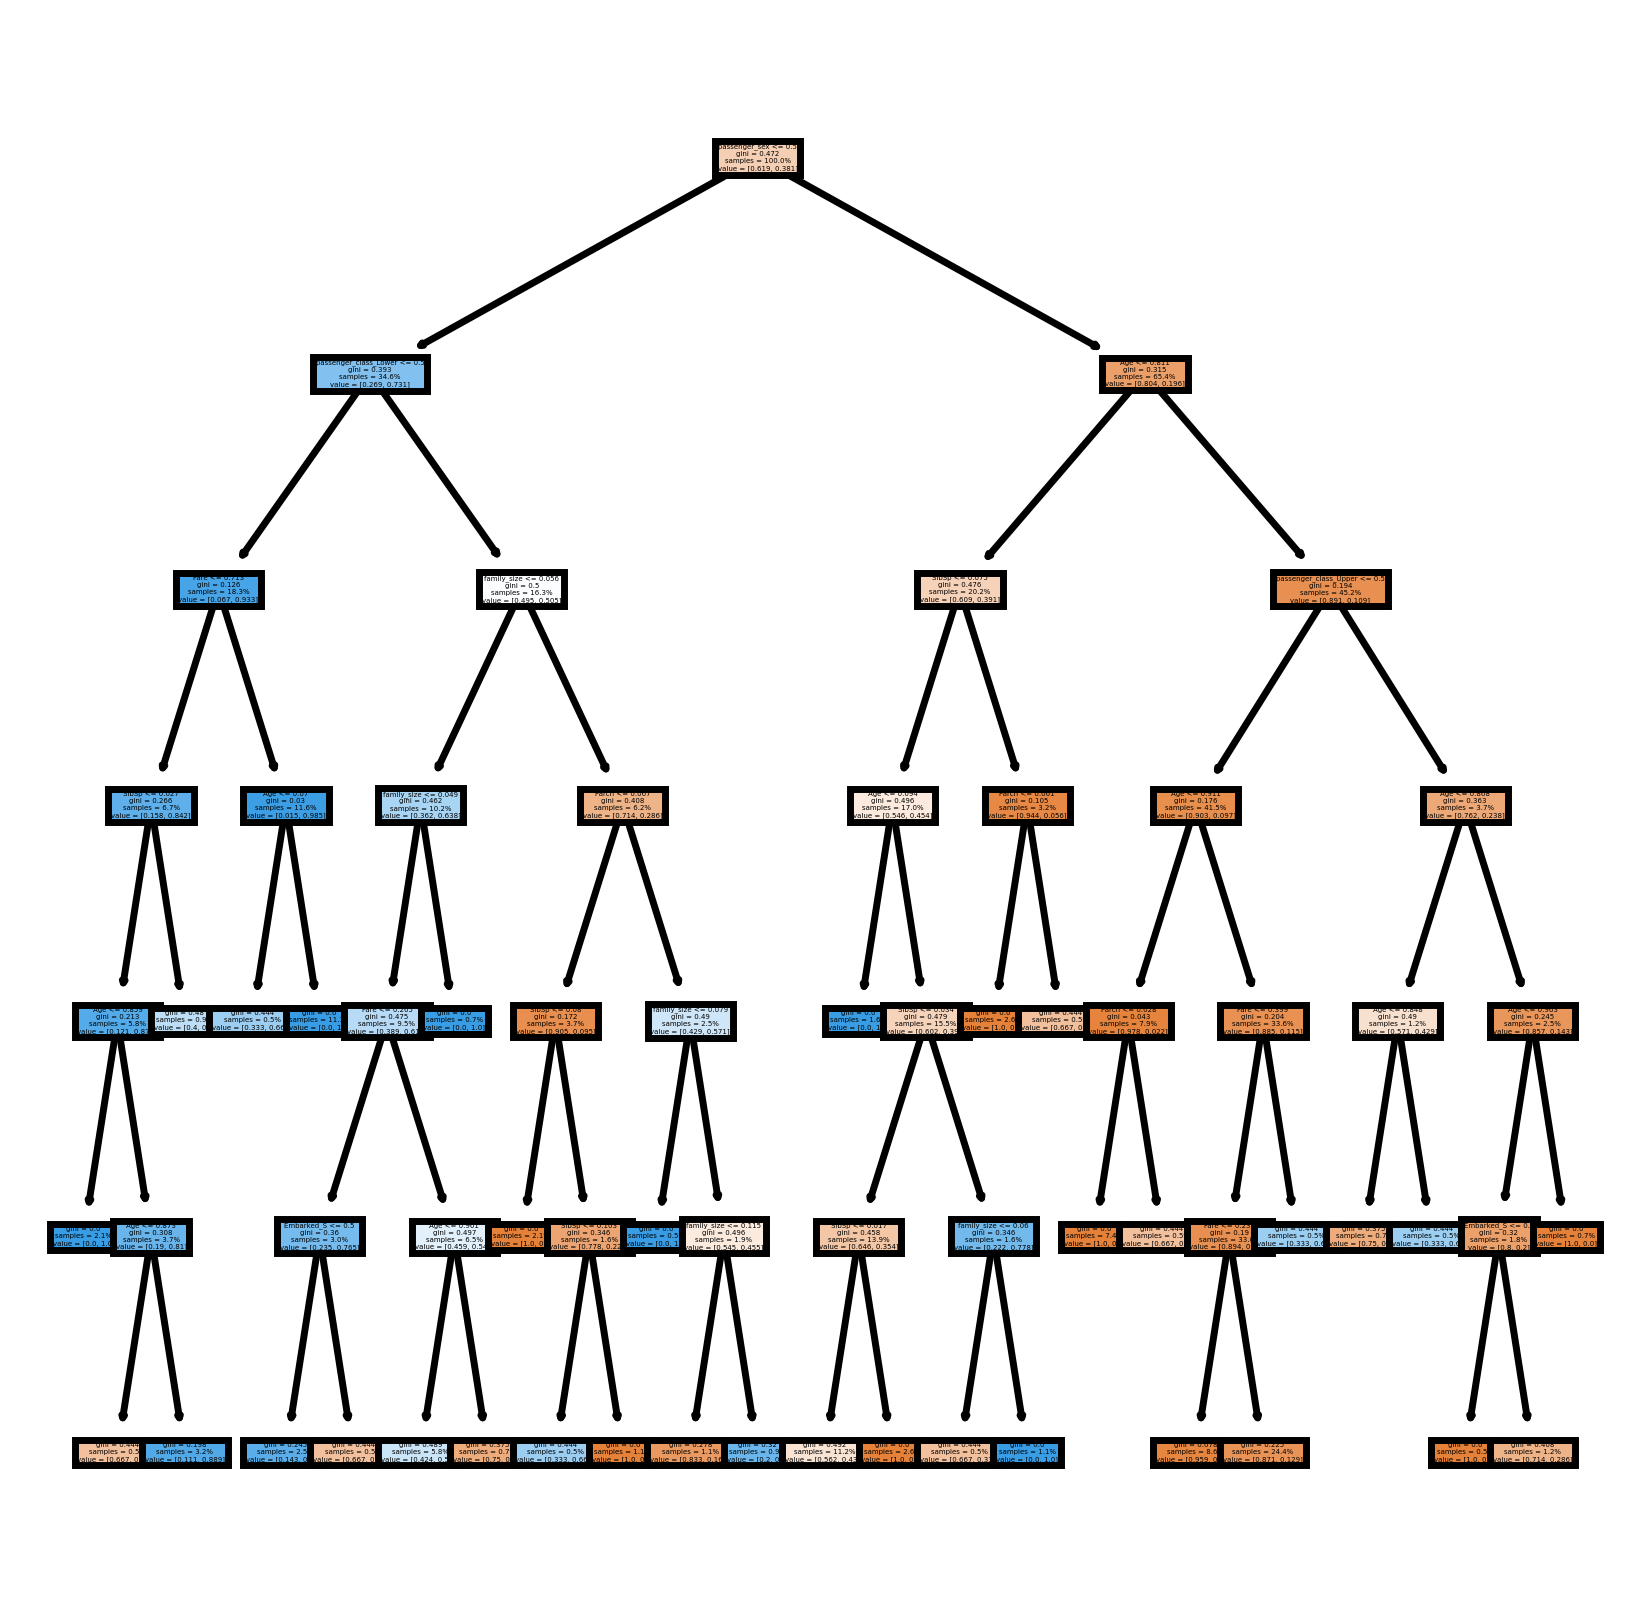

In [123]:
n = random.randint(0,len(x))
predict(n, x, y)

Número de fila del dato a predecir: 173
Predicción obtenida: Muerto
Dato Actual: Muerto
Probabilidad Logistic Regression Sigmoid: 0.35611146730289805
Probabilidad Naive Bayes: [1.0627403946408411e-11, 2.4754421290849465e-12]


0

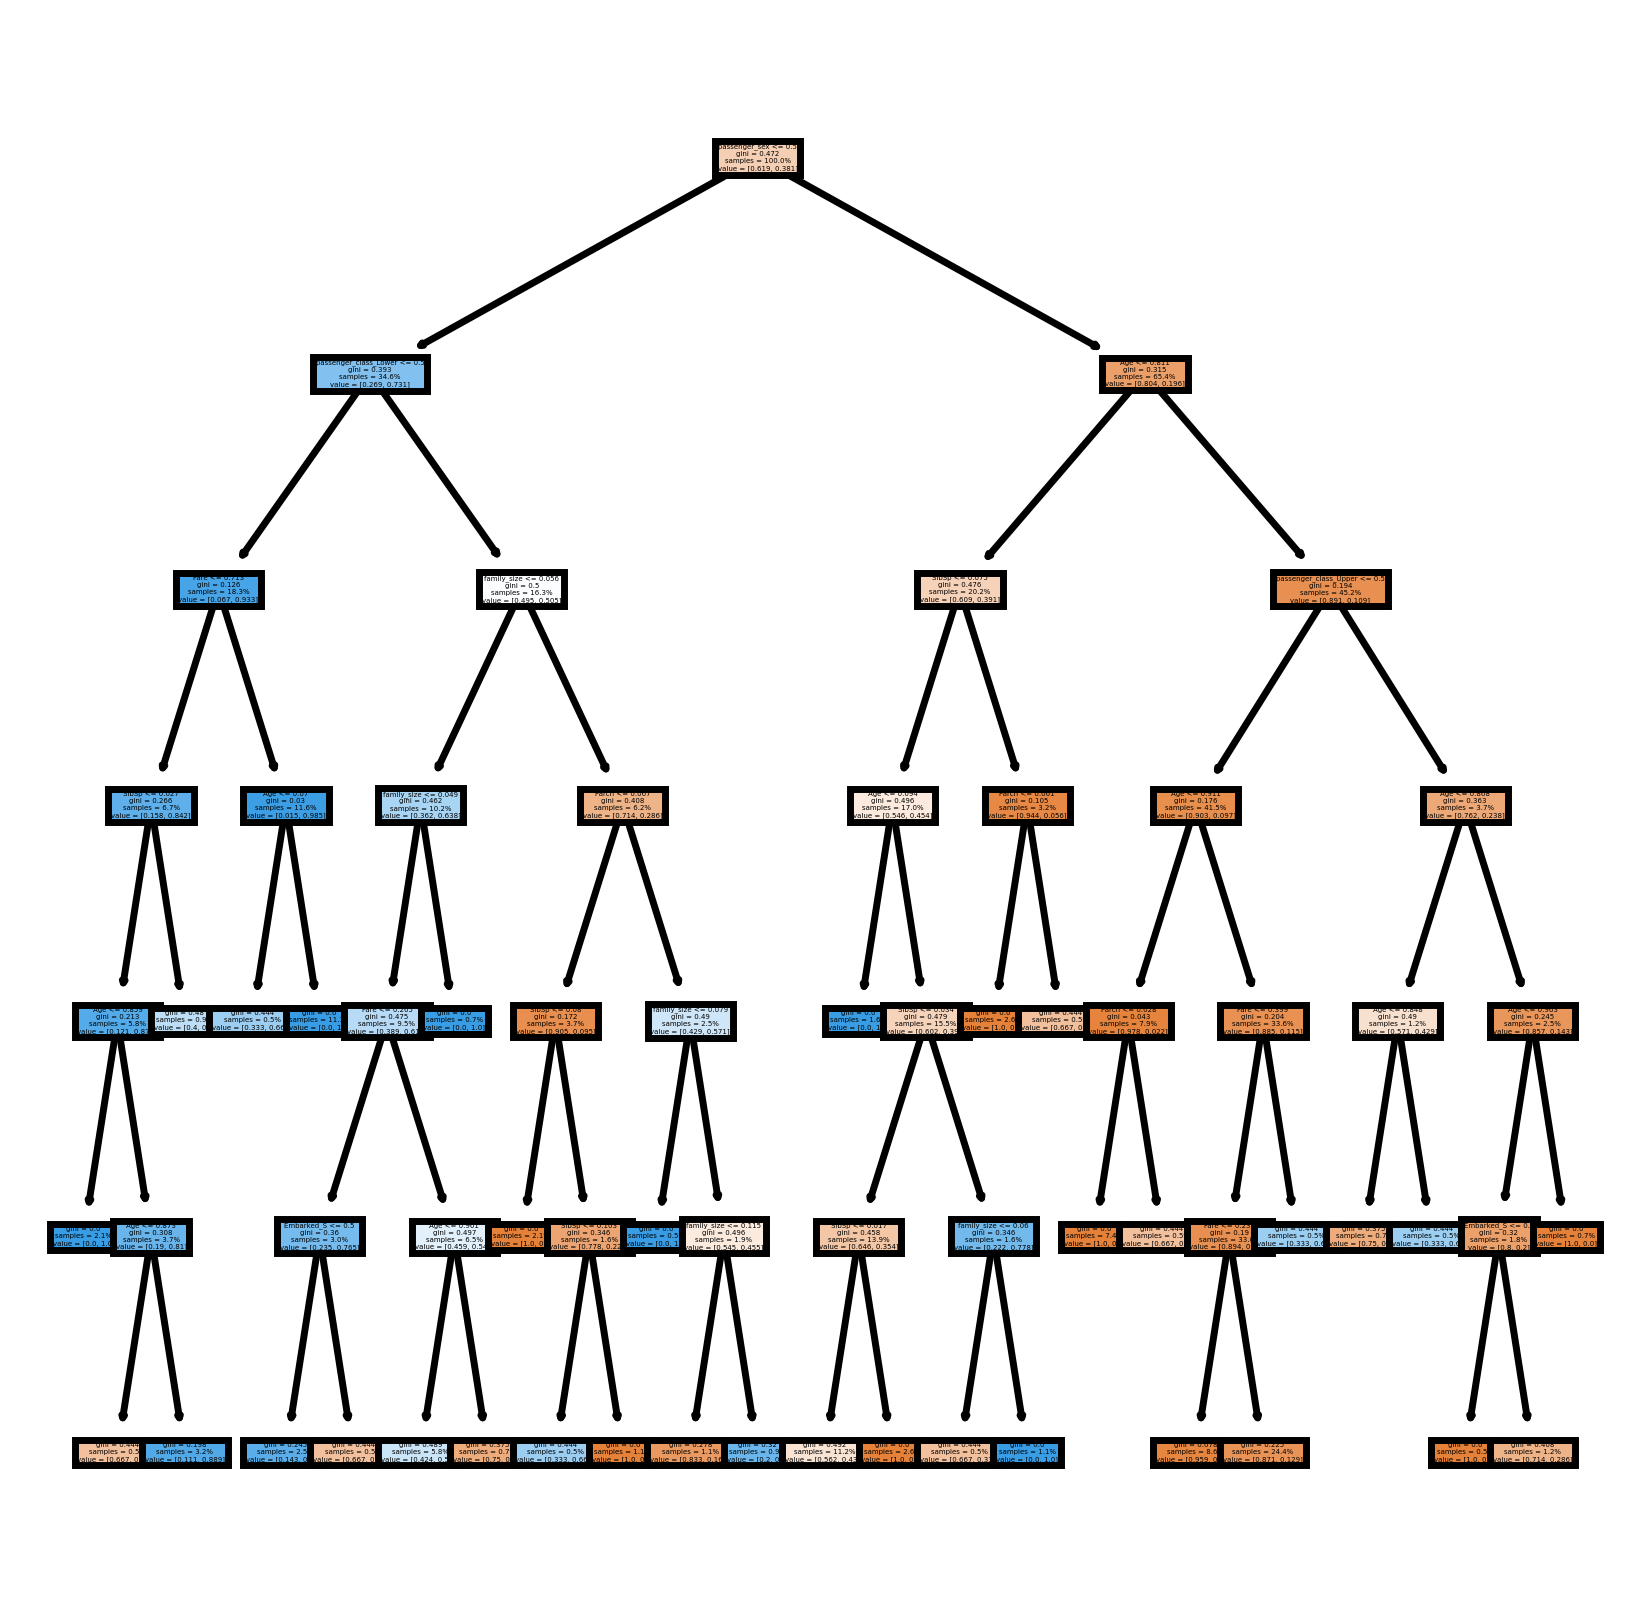

In [124]:
n = random.randint(0,len(x))
predict(n, x, y)

Número de fila del dato a predecir: 166
Predicción obtenida: Muerto
Dato Actual: Muerto
Probabilidad Logistic Regression Sigmoid: 0.3861770074592502
Probabilidad Naive Bayes: [9.439075163682195e-12, 4.206103272001352e-12]


0

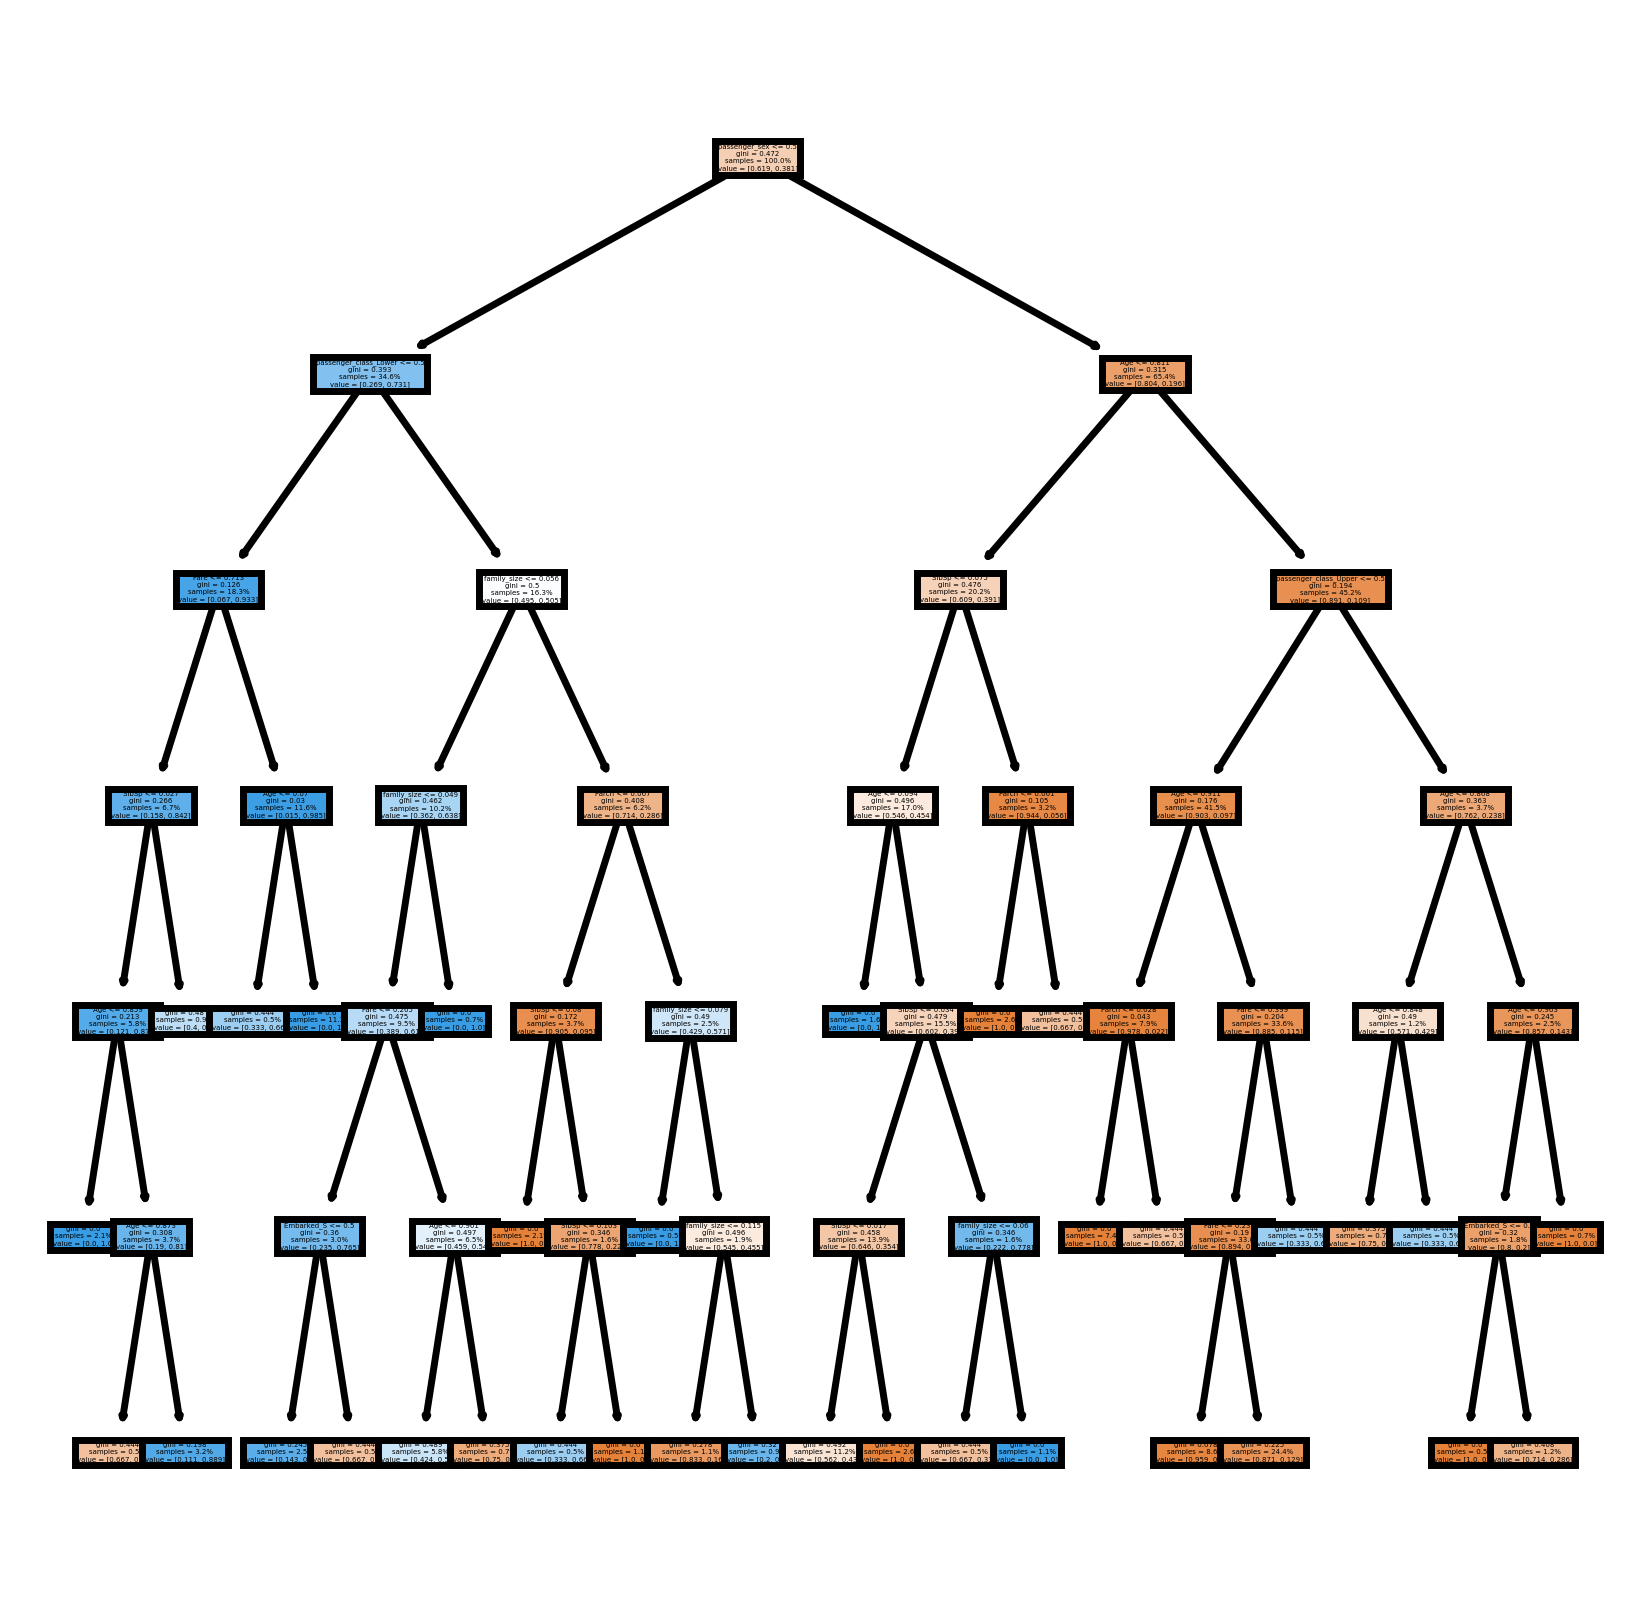

In [125]:
n = random.randint(0,len(x))
predict(n, x, y)

Número de fila del dato a predecir: 25
Predicción obtenida: Muerto
Dato Actual: Muerto
Probabilidad Logistic Regression Sigmoid: 0.12331651275463203
Probabilidad Naive Bayes: [5.931327047380234e-12, 4.181842532274126e-13]


0

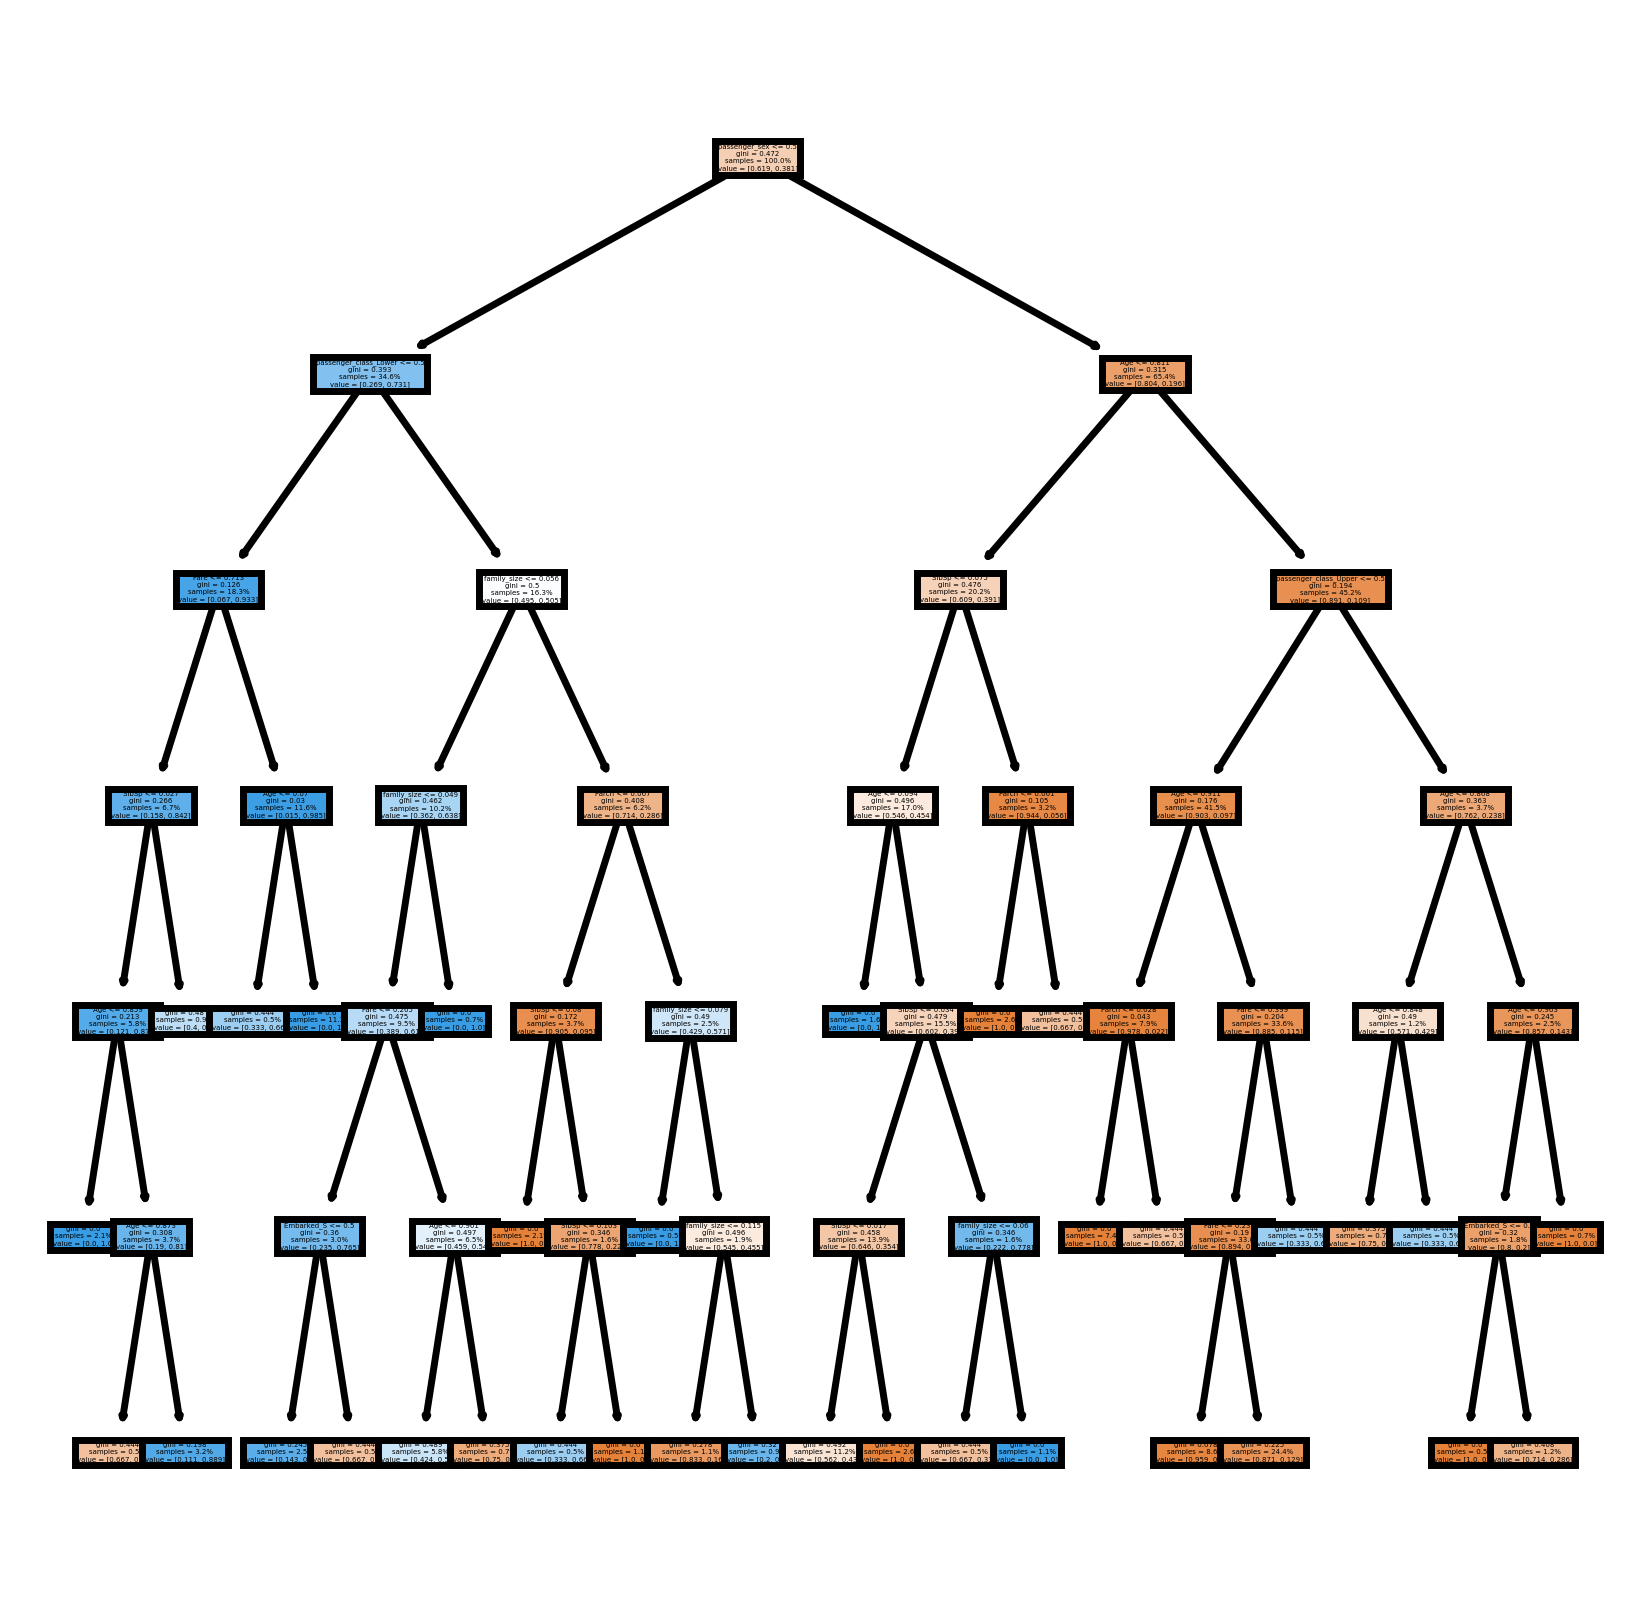

In [126]:
n = random.randint(0,len(x))
predict(n, x, y)

Número de fila del dato a predecir: 4
Predicción obtenida: Muerto
Dato Actual: Muerto
Probabilidad Logistic Regression Sigmoid: 0.3478027032407798
Probabilidad Naive Bayes: [5.407343391155138e-11, 1.8910515325667446e-11]


0

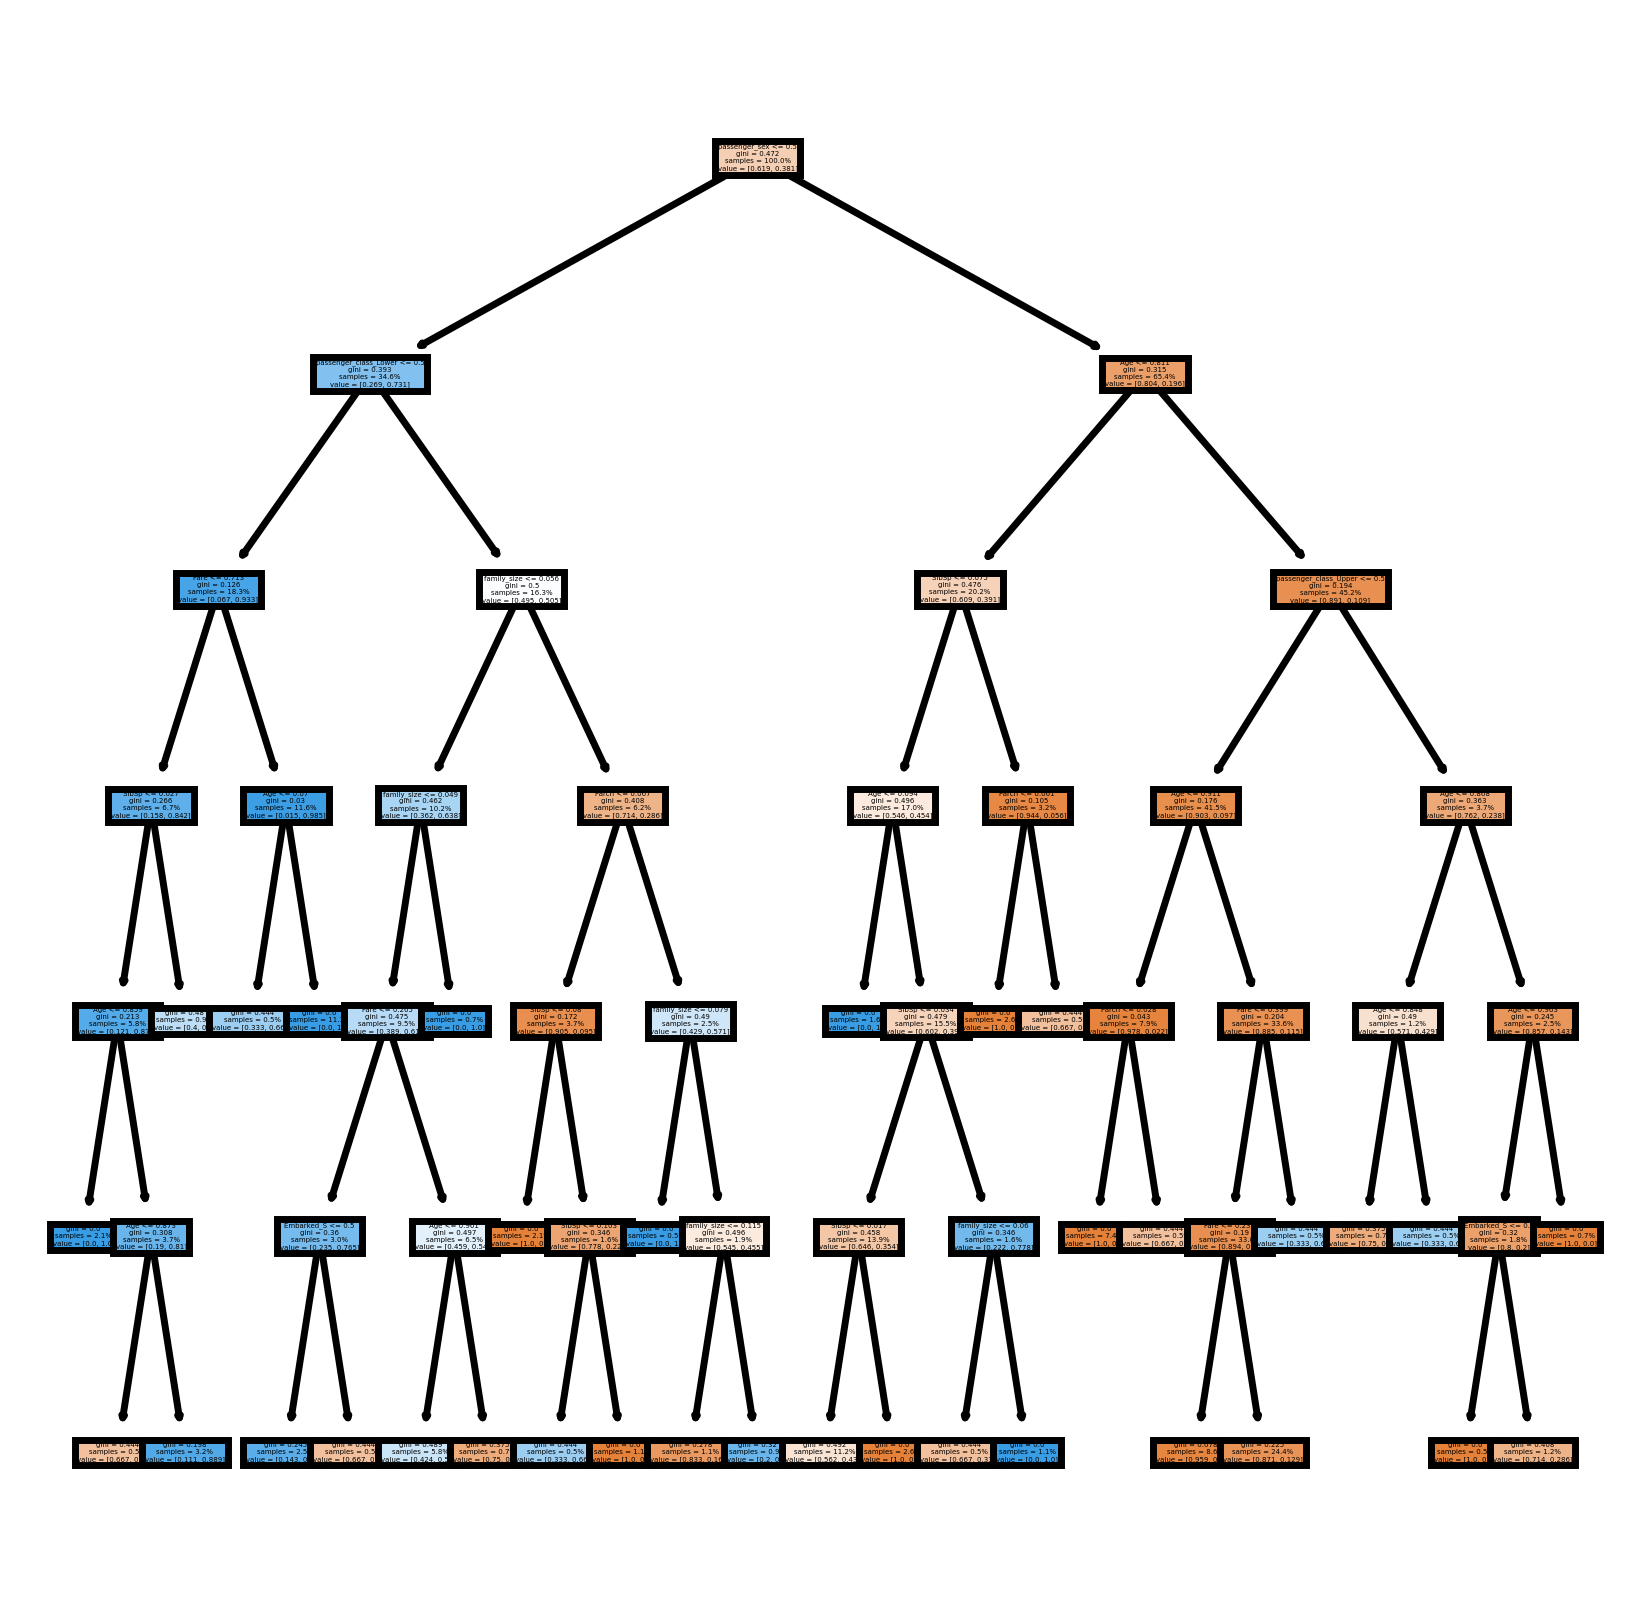

In [127]:
n = random.randint(0,len(x))
predict(n, x, y)